In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import plotly.express as px
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [35]:
df=pd.read_csv("acs2020_census_tract_data.csv")
data = pd.read_csv('acs2016_census_tract_data.csv')

# Pre-Processing Data

In [36]:
data = data.dropna()
data = data.drop(['CensusTract', 'County'],axis=1)
percentages = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific','Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office','Construction','Production','Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']
df["turnout_change"] = df["total_votes20"] - df["total_votes16"]
df["perc_turnout_change"] = df["turnout_change"] / df["TotalPop"]
df["trump_change"] = df["percentage20_Donald_Trump"] - df["percentage16_Donald_Trump"]
df["dem_change"] = df["percentage20_Joe_Biden"] - df["percentage16_Hillary_Clinton"]
df["case_rate"] = df["cases"] / df["TotalPop"]
df["death_rate"] = df["deaths"] / df["cases"]
df["death_rate_pop"] = df["deaths"] / df["TotalPop"]

# Visualisation

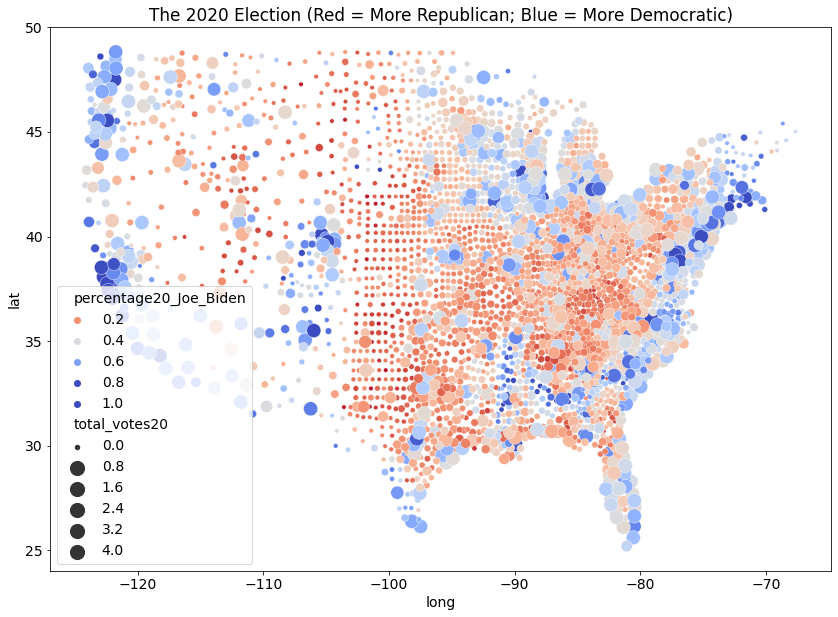

In [37]:
df_1 = df[~df["state"].isin(["AK", "HI"])]
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_1, x = "long", y = "lat", hue = "percentage20_Joe_Biden", size = "total_votes20", sizes = (20, 200), size_norm = (1000, 80000), hue_norm = (0.04,0.744),palette = "coolwarm_r")
plt.title("The 2020 Election (Red = More Republican; Blue = More Democratic)")
plt.show()

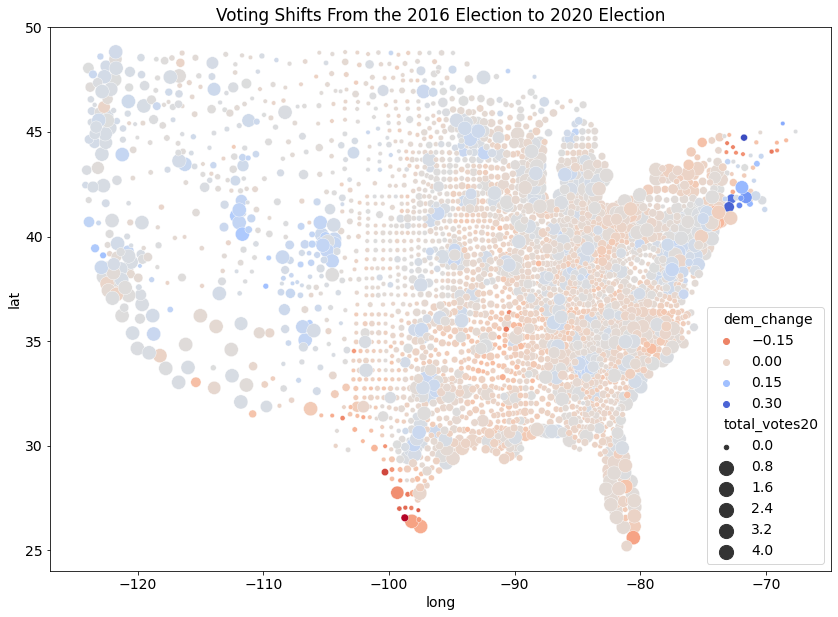

In [38]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_1, x = "long", y = "lat", hue = "dem_change", size = "total_votes20", sizes = (20, 200),size_norm = (1000, 80000), palette = "coolwarm_r")
plt.title("Voting Shifts From the 2016 Election to 2020 Election")
plt.show()

In [39]:
GOP2=df[df["percentage20_Donald_Trump"]>0.50001]
DEM1=df.drop(index=GOP2.index.tolist())
DEM1=DEM1.dropna()
DEM2=DEM1[DEM1["percentage16_Donald_Trump"]>0.50001]
DEM2.sort_values(by="percentage16_Donald_Trump",ascending=False)

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,SelfEmployed,FamilyWork,Unemployment,turnout_change,perc_turnout_change,trump_change,dem_change,case_rate,death_rate,death_rate_pop
882,Essex,VT,0.557,0.377,2706.0,1506.0,1019.0,0.254,0.712,13443.0,...,9.6,0.2,5.1,10737.0,1.730937,-0.303,0.335,0.001451,0.000000,0.000000
1672,Litchfield,CT,0.548,0.409,97434.0,53376.0,39836.0,0.478,0.500,5342.0,...,8.6,0.2,6.0,-92092.0,-0.499268,-0.070,0.091,0.012496,0.062473,0.000781
2723,Talbot,MD,0.539,0.420,18731.0,10098.0,7865.0,0.494,0.489,21305.0,...,9.7,0.0,4.4,2574.0,0.068711,-0.045,0.069,0.017618,0.009091,0.000160
2260,Platte,MO,0.535,0.406,46641.0,24975.0,18915.0,0.500,0.480,58523.0,...,4.8,0.2,4.0,11882.0,0.122623,-0.035,0.074,0.010888,0.012322,0.000134
1329,Inyo,CA,0.532,0.395,7761.0,4128.0,3067.0,0.485,0.491,9147.0,...,8.4,0.0,5.2,1386.0,0.076175,-0.047,0.096,0.013245,0.062241,0.000824
1064,Grand,CO,0.525,0.390,8513.0,4467.0,3319.0,0.495,0.477,9804.0,...,2.7,0.0,4.6,1291.0,0.087271,-0.030,0.087,0.010748,0.006289,0.000068
2732,Tarrant,TX,0.522,0.435,662832.0,345683.0,288001.0,0.491,0.493,831322.0,...,5.6,0.1,5.4,168490.0,0.084938,-0.031,0.058,0.034397,0.012252,0.000421
3038,Williamson,TX,0.519,0.420,200524.0,104029.0,84252.0,0.482,0.495,287696.0,...,6.4,0.1,4.8,87172.0,0.171493,-0.037,0.075,0.018862,0.016270,0.000307
2198,Penobscot,ME,0.519,0.409,80228.0,41601.0,32832.0,0.360,0.602,851.0,...,6.2,0.1,6.5,-79377.0,-0.521243,-0.159,0.193,0.002042,0.019293,0.000039
2646,Stafford,VA,0.518,0.427,65350.0,33840.0,27879.0,0.475,0.508,79257.0,...,3.6,0.1,4.3,13907.0,0.098520,-0.043,0.081,0.017370,0.008564,0.000149


In [40]:
fig = px.scatter(GOP2, x='state', y='cases',title="COVID cases in the states in which Trump won at least 50% of the votes in 2020")
fig.show()
fig1 = px.scatter(DEM2, x='state', y='cases',title="COVID cases in the states in which Trump won at most 49% of the votes in 2020")
fig1.show()

In [41]:
fig = px.scatter(GOP2, x='state', y='deaths',title="COVID deaths in the counties in which Trump won at least 50% of the votes in 2020")
fig.update_yaxes(nticks=20)
fig.show()
fig = px.scatter(DEM2, x='state', y='deaths',title="COVID deaths in the counties in which Mr. Trump won at most 50% of the votes in 2020")
fig.update_yaxes(nticks=10)
fig.show()

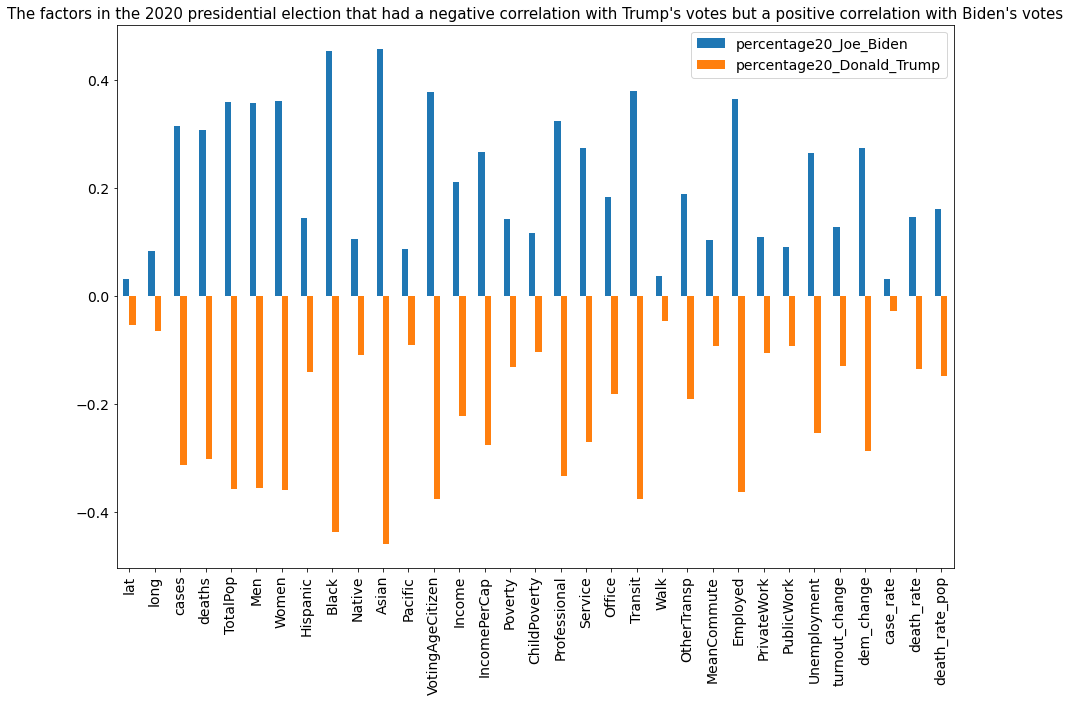

In [42]:
corr = df.corr(method='pearson')
corr1=pd.DataFrame(corr.loc["percentage20_Donald_Trump"])
#positive correlation with Trump winning :
corr2=corr1[corr1["percentage20_Donald_Trump"]>0]
#negative correlation with Trump winning :
corr3=corr1[corr1["percentage20_Donald_Trump"]<0]
#positive correlation with Biden winning :
corr4=pd.DataFrame(corr.loc["percentage20_Joe_Biden"])
corr5=corr4[corr4["percentage20_Joe_Biden"]>0]
#concatination correlation with Biden and Trump impacts :
corr6=pd.concat([corr5,corr3],axis=1)
corr6.drop(["percentage16_Hillary_Clinton","total_votes16","votes16_Donald_Trump","votes16_Hillary_Clinton","percentage20_Joe_Biden","total_votes20","votes20_Donald_Trump","votes20_Joe_Biden"],inplace=True)
corr6.plot(kind="bar",figsize=(15,10))
plt.title("The factors in the 2020 presidential election that had a negative correlation with Trump's votes but a positive correlation with Biden's votes",fontsize=15)
plt.show()

Text(0.5, 1.0, 'TotalPop in each state')

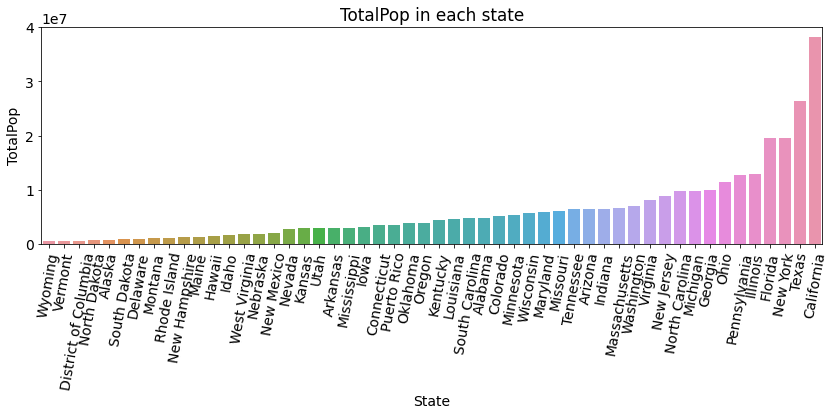

In [43]:
data2 = data.groupby('State', as_index=False).sum()
data2 = data2.sort_values('TotalPop')
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=data2['State'], y=data2['TotalPop'], data=data2)
plt.xticks(rotation=80)
plt.title("TotalPop in each state")

Text(0.5, 1.0, 'Income in each state')

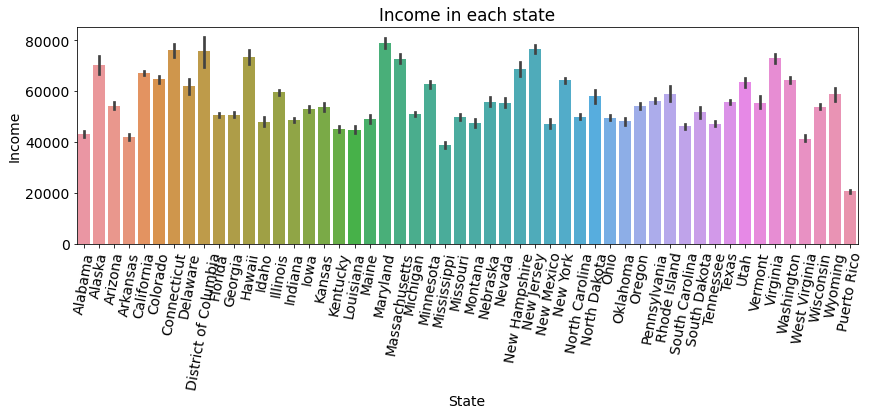

In [44]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=data['State'], y=data['Income'], data=data)
plt.xticks(rotation=80)
plt.title("Income in each state")

Text(0.5, 1.0, 'Poverty in each state')

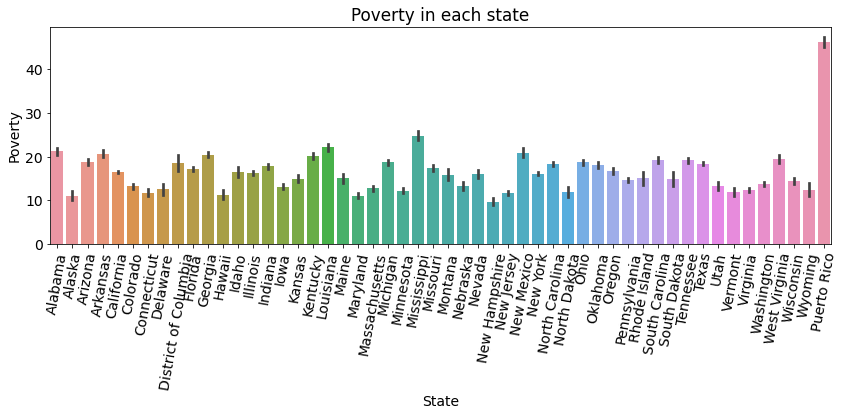

In [45]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=data['State'], y=data['Poverty'], data=data)
plt.xticks(rotation=80)
plt.title("Poverty in each state")

# Regression:

In [46]:
df=pd.read_csv("acs2020_census_tract_data.csv")

In [47]:
df.dropna(inplace=True)
data = df.groupby('state').mean()
data['Total_votes']=list(df.groupby(['state'])['total_votes20'].sum())
data['cases']=list(df.groupby(['state'])['cases'].sum())
data['deaths']=list(df.groupby(['state'])['deaths'].sum())
data['TotalPop']=list(df.groupby(['state'])['TotalPop'].sum())
data.rename(columns={"percentage20_Donald_Trump": "Percentage_votes_Donald_Trump", "percentage20_Joe_Biden": "Percentage_votes_Joe_Biden","total_votes20":"Total_votes",'votes20_Donald_Trump':"votes_Donald_Trump","votes20_Joe_Biden":"Votes_Joe_Biden"},inplace=True)
data['Percentage_votes_Donald_Trump']=data['Percentage_votes_Donald_Trump']*100
data['Percentage_votes_Joe_Biden']=data['Percentage_votes_Joe_Biden']*100

In [48]:
Y=data['Percentage_votes_Donald_Trump']
#Y=data ['Votes_Joe_Biden']
X=data['Unemployment']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.041
Model:                                       OLS   Adj. R-squared:                  0.021
Method:                            Least Squares   F-statistic:                     2.029
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):              0.161
Time:                                   19:55:06   Log-Likelihood:                -205.50
No. Observations:                             50   AIC:                             415.0
Df Residuals:                                 48   BIC:                             418.8
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------



  # $Percentage\space Donald \space Trump=\beta_0+\beta_1Unemployement+\beta_2Poverty$

In [49]:
Y=data['Percentage_votes_Donald_Trump']
#Y=data ['Votes_Joe_Biden']
X=data[['Unemployment','Poverty']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.374
Model:                                       OLS   Adj. R-squared:                  0.347
Method:                            Least Squares   F-statistic:                     14.02
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           1.68e-05
Time:                                   19:55:06   Log-Likelihood:                -194.84
No. Observations:                             50   AIC:                             395.7
Df Residuals:                                 47   BIC:                             401.4
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [50]:
data["cases"]=(data['cases']/data['cases'].sum())*100
Y=data['Percentage_votes_Joe_Biden']
#Y=data ['Votes_Joe_Biden']
X=data[['Unemployment','Poverty','deaths','cases','Construction', 'Production','Income']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Percentage_votes_Joe_Biden   R-squared:                       0.872
Model:                                    OLS   Adj. R-squared:                  0.850
Method:                         Least Squares   F-statistic:                     40.80
Date:                        Tue, 06 Apr 2021   Prob (F-statistic):           9.86e-17
Time:                                19:55:06   Log-Likelihood:                -155.15
No. Observations:                          50   AIC:                             326.3
Df Residuals:                              42   BIC:                             341.6
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [51]:
Y=data['Percentage_votes_Donald_Trump']
#Y=data ['Votes_Joe_Biden']
X=data[['Unemployment','Poverty','deaths','cases','Construction', 'Production','Income']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.865
Model:                                       OLS   Adj. R-squared:                  0.842
Method:                            Least Squares   F-statistic:                     38.44
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           2.87e-16
Time:                                   19:55:06   Log-Likelihood:                -156.48
No. Observations:                             50   AIC:                             329.0
Df Residuals:                                 42   BIC:                             344.3
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [52]:
X.corr()

,const,Unemployment,Poverty,deaths,cases,Construction,Production,Income
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unemployment,NaN,1.000000,0.754247,0.277919,0.293714,-0.177328,0.101459,-0.339925
Poverty,NaN,0.754247,1.000000,0.057873,0.198636,0.178321,0.361196,-0.762514
deaths,NaN,0.277919,0.057873,1.000000,0.798578,-0.148241,-0.034283,0.085230
cases,NaN,0.293714,0.198636,0.798578,1.000000,0.059020,0.101361,-0.118474
Construction,NaN,-0.177328,0.178321,-0.148241,0.059020,1.000000,0.187808,-0.552942
Production,NaN,0.101459,0.361196,-0.034283,0.101361,0.187808,1.000000,-0.652412
Income,NaN,-0.339925,-0.762514,0.085230,-0.118474,-0.552942,-0.652412,1.000000


In [53]:
Y=data['Percentage_votes_Donald_Trump']
X=data[['Unemployment','Poverty','cases','Construction', 'Production']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.851
Model:                                       OLS   Adj. R-squared:                  0.834
Method:                            Least Squares   F-statistic:                     50.36
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           4.17e-17
Time:                                   19:55:06   Log-Likelihood:                -158.90
No. Observations:                             50   AIC:                             329.8
Df Residuals:                                 44   BIC:                             341.3
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

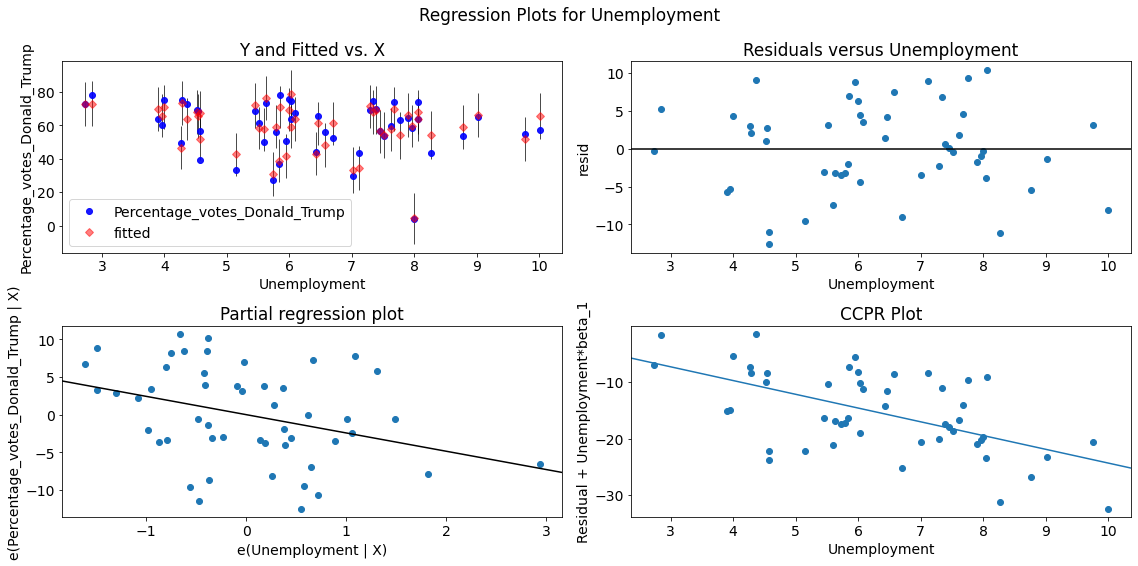

In [54]:
fig = sm.graphics.plot_regress_exog(results, "Unemployment")
fig.tight_layout(pad=1.0)

In [55]:
Y=data['Percentage_votes_Donald_Trump']
X=data[['Unemployment','Poverty','cases','Construction', 'Production']]
X = sm.add_constant(X)
rlm_model = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.summary())

                          Robust linear Model Regression Results                         
Dep. Variable:     Percentage_votes_Donald_Trump   No. Observations:                   50
Model:                                       RLM   Df Residuals:                       44
Method:                                     IRLS   Df Model:                            5
Norm:                                     HuberT                                         
Scale Est.:                                  mad                                         
Cov Type:                                     H1                                         
Date:                           Tue, 06 Apr 2021                                         
Time:                                   19:55:07                                         
No. Iterations:                               25                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------

 **Part2: Change of the impact of unemployment between 2016 and 2020 elections**

In [56]:
df2=pd.read_csv("acs2016_census_tract_data.csv") # data for 2016 election
df2=df2.groupby('State').mean()
data['percentage16_Donald_Trump']=data['percentage16_Donald_Trump']*100
df2.rename(index={'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY','Puerto Rico': 'PR'},inplace=True)

def intersection_2_listes(L1, L2):

    result = []
 
    for n in L1:
        for x in L2:
            if n == x and n not in result:
                result.append(n)
    result.sort()
 
    return result

final_index=intersection_2_listes(df2.index,data.index)
x2=list(set(df2.index) - set(final_index))
df2=df2.drop(x2)
df2=df2.sort_index()
data=data.sort_index()



In [57]:
Y16=data['percentage16_Donald_Trump']
df2['cases']=np.zeros(len(df2['Unemployment']))
X16=df2[['Unemployment','Poverty','cases','Construction', 'Production']]
X16 = sm.add_constant(X16)
model = sm.OLS(Y16, X16)
results = model.fit()   
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     percentage16_Donald_Trump   R-squared:                       0.575
Model:                                   OLS   Adj. R-squared:                  0.538
Method:                        Least Squares   F-statistic:                     15.24
Date:                       Tue, 06 Apr 2021   Prob (F-statistic):           5.99e-08
Time:                               19:55:07   Log-Likelihood:                -181.02
No. Observations:                         50   AIC:                             372.0
Df Residuals:                             45   BIC:                             381.6
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\Mootez\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning:

divide by zero encountered in double_scalars



In [58]:
Y_final=Y-Y16
X_final=X-X16

model = sm.OLS(Y_final, X_final)
results = model.fit()   
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              2.946
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                      0.0220
Time:                        19:55:07   Log-Likelihood:                         -128.78
No. Observations:                  50   AIC:                                      267.6
Df Residuals:                      45   BIC:                                      277.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\Mootez\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning:

divide by zero encountered in double_scalars



In [59]:
# Panel data without COVID CASES
Y16 = data["percentage16_Donald_Trump"]
Y20 = data["Percentage_votes_Donald_Trump"]
X16=df2[['Unemployment','Poverty','Construction', 'Production']]
X20=data[['Unemployment','Poverty','Construction', 'Production']]
Y=Y20-Y16
X=X20-X16

In [60]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.369
Date:                Tue, 06 Apr 2021   Prob (F-statistic):             0.0667
Time:                        19:55:07   Log-Likelihood:                -128.40
No. Observations:                  50   AIC:                             266.8
Df Residuals:                      45   BIC:                             276.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1061      1.269      0.871   

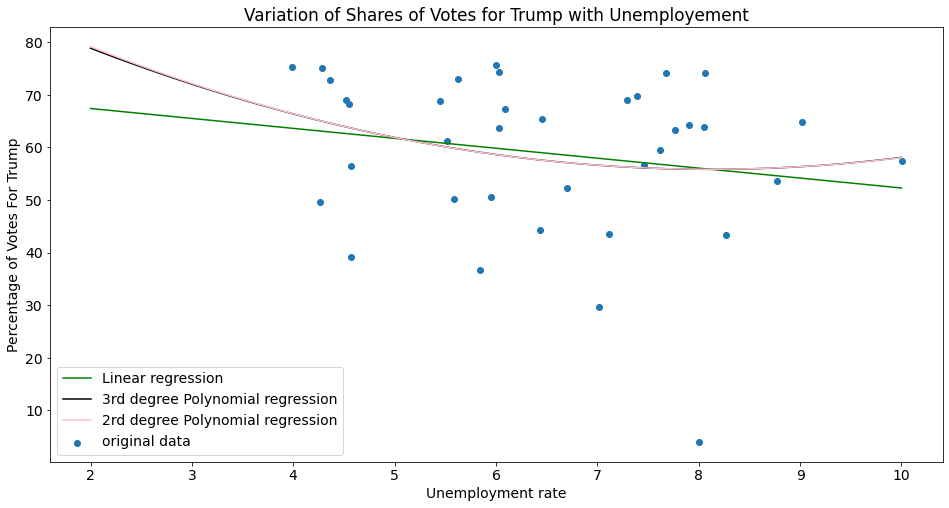

In [61]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy import stats

#Splitting the data
X=data[['Unemployment','Poverty','cases','Construction', 'Production']]
y=data['Percentage_votes_Donald_Trump']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Linear regression
slope, intercept, r, p, std_err = stats.linregress(X_train['Unemployment'], y_train)

def myfunc(x):
  return slope * x + intercept


#Polynomial degree 3
mymodel = np.poly1d(np.polyfit(X_train['Unemployment'], y_train, 3)) # contains the coefficients of the polynomial
#Polynomial degree 2
mymodel_poly2 = np.poly1d(np.polyfit(X_train['Unemployment'], y_train, 2)) # contains the coefficients of the polynomial
#Logarithmic regression
log_x_data = np.log(X_train['Unemployment'])
y_data=y_train
curve_fit=np.polyfit(log_x_data,y_data, 1)
#Visualisation
myline = np.linspace(2, 10, 100)
plt.scatter(X_train['Unemployment'], y_train,label='original data')
mymodel_lin = list(map(myfunc, myline))
plt.plot( myline, mymodel_lin,'green',label='Linear regression')
plt.plot(myline, mymodel(myline),'black',label='3rd degree Polynomial regression')
plt.plot(myline, mymodel_poly2(myline),'pink',label='2rd degree Polynomial regression')

plt.title("Variation of Shares of Votes for Trump with Unemployement")
plt.xlabel('Unemployment rate')
plt.ylabel('Percentage of Votes For Trump')
plt.legend()



In [62]:
from sklearn import metrics
y_pred_lin=slope * X_test['Unemployment'] + intercept
y_pred_poly_2=mymodel_poly2(X_test['Unemployment'])
y_pred_poly=mymodel(X_test['Unemployment'])
y_pred_log=y = curve_fit[0] * np.log(X_test['Unemployment']) +curve_fit[1]

print("For the linear regression we obtained")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('\n********************')
print("For the 2nd degree polynomial regression we obtained")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('\n********************')
print("For the 3nd degree polynomial regression we obtained")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_poly_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly_2)))



For the linear regression we obtained
Mean Absolute Error: 10.302369113816177
Mean Squared Error: 212.5250586531978
Root Mean Squared Error: 14.578239216489685

********************
For the 2nd degree polynomial regression we obtained
Mean Absolute Error: 9.688848156057109
Mean Squared Error: 202.14403630975696
Root Mean Squared Error: 14.217736680279213

********************
For the 3nd degree polynomial regression we obtained
Mean Absolute Error: 9.689332352948279
Mean Squared Error: 201.97594714905682
Root Mean Squared Error: 14.211824202017727


In [63]:
Y=data['Percentage_votes_Donald_Trump']
Unemployment=data["Unemployment"]
Unemployment2=data["Unemployment"]**2
Unemployment3=data["Unemployment"]**3
Poverty=data["Poverty"]
cases=data["cases"]
Construction=data["Construction"]
Production=data["Production"]
X=np.column_stack((Unemployment,Unemployment2,Unemployment3,Poverty,cases,Construction,Production))
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()   
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.860
Model:                                       OLS   Adj. R-squared:                  0.837
Method:                            Least Squares   F-statistic:                     36.97
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           5.75e-16
Time:                                   19:55:08   Log-Likelihood:                -157.32
No. Observations:                             50   AIC:                             330.6
Df Residuals:                                 42   BIC:                             345.9
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [64]:
from statsmodels.formula.api import ols
data['Unemployment2']=data['Unemployment']**2
data['Unemployment3']=data['Unemployment']**3
data['UnemploymentPoverty']=data['Unemployment']*data["Poverty"]
data['Unemploymentcases']=data['Unemployment']*data["cases"]
data['UnemploymentConstruction']=data['Unemployment']*data["Construction"]
data['UnemploymentProduction']=data['Unemployment']*data["Production"]
formula = 'Percentage_votes_Donald_Trump ~ Unemployment+ Unemployment2 + Unemployment3 + Poverty + cases + Construction+ Production'
results = ols(formula, data).fit()
hypotheses = '(Unemployment2 = 0), (Unemployment3 = 0)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[1.37121193]]), p=0.2649265206308687, df_denom=42, df_num=2>


In [65]:
formula = 'Percentage_votes_Donald_Trump ~ Unemployment + Poverty +UnemploymentPoverty+ cases + Construction + Production'
results = ols(formula, data).fit()
hypotheses = '(Unemployment = 0), (UnemploymentPoverty = 0)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.summary())

<F test: F=array([[4.49450697]]), p=0.016883901801168003, df_denom=43, df_num=2>
                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.860
Model:                                       OLS   Adj. R-squared:                  0.840
Method:                            Least Squares   F-statistic:                     43.86
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           9.30e-17
Time:                                   19:55:08   Log-Likelihood:                -157.47
No. Observations:                             50   AIC:                             328.9
Df Residuals:                                 43   BIC:                             342.3
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                   

In [66]:
formula = 'Percentage_votes_Donald_Trump ~ Unemployment + Poverty +Unemploymentcases+ cases + Construction + Production'
results = ols(formula, data).fit()
hypotheses = '(Unemployment = 0), (Unemploymentcases = 0)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.summary())

<F test: F=array([[3.3111071]]), p=0.045976383311860713, df_denom=43, df_num=2>
                                  OLS Regression Results                                 
Dep. Variable:     Percentage_votes_Donald_Trump   R-squared:                       0.853
Model:                                       OLS   Adj. R-squared:                  0.832
Method:                            Least Squares   F-statistic:                     41.54
Date:                           Tue, 06 Apr 2021   Prob (F-statistic):           2.49e-16
Time:                                   19:55:08   Log-Likelihood:                -158.63
No. Observations:                             50   AIC:                             331.3
Df Residuals:                                 43   BIC:                             344.6
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                    